# Chapter 6

In [1]:
using ControlSystems
using Plots; gr()
using LinearAlgebra

## ナイキストの安定判別

In [2]:
P = tf([0, 1], [1, 1, 1.5, 1])
println(P)
println(pole(P))

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
            1.0
----------------------------
1.0s^3 + 1.0s^2 + 1.5s + 1.0

Continuous-time transfer function model
ComplexF64[-0.12040192275078712 + 1.1413527165187305im, -0.12040192275078712 - 1.1413527165187305im, -0.7591961544984255 + 0.0im]


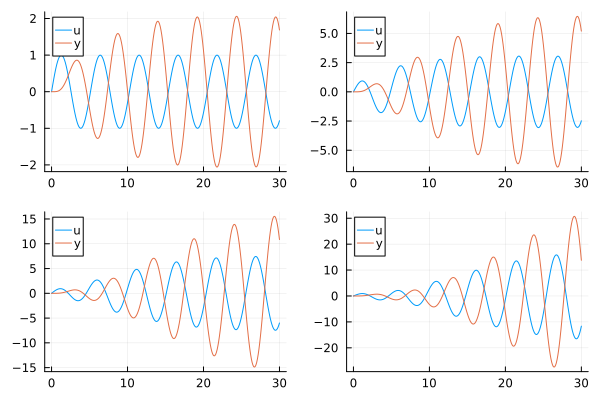

In [3]:
P = tf([0,1],[1,1,1.5,1])
# 位相が 180[deg] 遅れる周波数を取得
wpc, _, _, _ = margin(P);

t = 0:0.1:30;
u = sin.(wpc[]*t);
y = 0 .* u;

p = [ plot() plot(); plot() plot() ]

for i in [1,2]
    for j in [1,2]
        # 出力をネガティブフィードバックして次の時刻の入力を生成
        u = sin.(wpc[]*t) - vec(y)
        y, t, x, uout = lsim(P, u', t)
        plot!(p[i,j], t, u, label="u");
        plot!(p[i,j], t, vec(y), label="y");
    end
end

plot( p[1,1], p[1,2], p[2,1], p[2,2], layout=(2,2))

In [4]:
P = tf([0, 1], [1, 2, 1.9999, 1])
println(P)
println(pole(P))

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
              1.0
-------------------------------
1.0s^3 + 2.0s^2 + 1.9999s + 1.0

Continuous-time transfer function model
ComplexF64[-1.0000999999990001 + 0.0im, -0.4999500000004993 + 0.8659965401198194im, -0.4999500000004993 - 0.8659965401198194im]


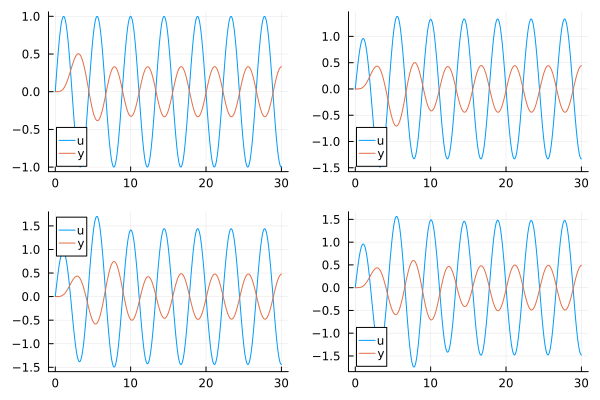

In [5]:
P = tf([0,1],[1,2,1.9999,1])
# 位相が 180[deg] 遅れる周波数を取得
wpc, _, _, _ = margin(P);

t = 0:0.1:30;
u = sin.(wpc[]*t);
y = 0 .* u;

p = [ plot() plot(); plot() plot() ]

for i in [1,2]
    for j in [1,2]
        # 出力をネガティブフィードバックして次の時刻の入力を生成
        u = sin.(wpc[]*t) - vec(y)
        y, t, x, uout = lsim(P, u', t)
        plot!(p[i,j], t, u, label="u");
        plot!(p[i,j], t, vec(y), label="y");
    end
end

plot( p[1,1], p[1,2], p[2,1], p[2,2], layout=(2,2))

┌ Warning: Keyword argument hover not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefo

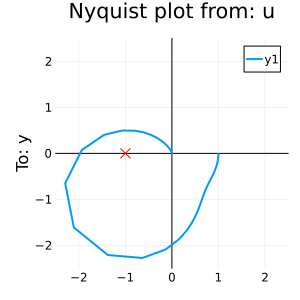

In [6]:
# 閉ループ系が不安定になる場合
P = tf([0, 1],[1, 1, 1.5, 1])

nyquistplot(P, gaincircle=true, lw = 2, xlims=(-2.5,2.5), ylims=(-2.5,2.5), size=(300,300))

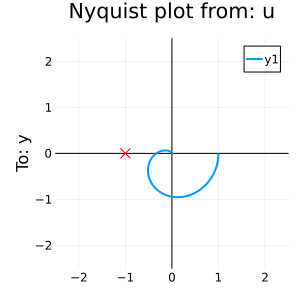

In [7]:
# 閉ループ系が安定になる場合
P = tf([0, 1],[1, 2, 1.9999, 1])

nyquistplot(P, gaincircle=true, lw = 2, xlims=(-2.5,2.5), ylims=(-2.5,2.5), size=(300,300))

## アームの角度制御（PID制御）

In [8]:
g  = 9.81                # 重力加速度[m/s^2]
l  = 0.2                 # アームの長さ[m]
M  = 0.5                 # アームの質量[kg]
mu = 1.5e-2              # 粘性摩擦係数
J  = 1.0e-2              # 慣性モーメント

P = tf( [0,1], [J, mu, M*g*l] )

ref = 30 # 目標角度 [deg]

30

### P制御

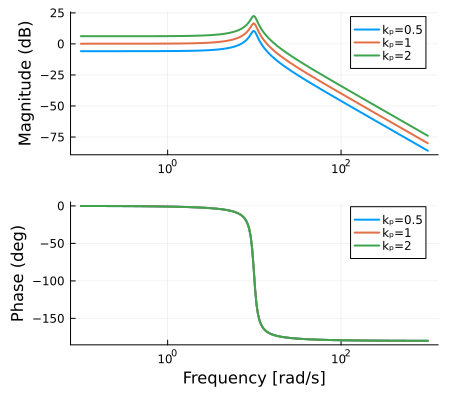

In [9]:
kp = (0.5, 1, 2)

H = [ P*tf([0, kp[i]], [0, 1]) for i = 1:length(kp) ]

setPlotScale("dB")
bodeplot(H, lw=2, size=(450,400),
    label=["kₚ=$(kp[1])" "kₚ=$(kp[1])" "kₚ=$(kp[2])" "kₚ=$(kp[2])" "kₚ=$(kp[3])" "kₚ=$(kp[3])"],
    legend=:best, title=""  )

In [10]:
for i in 1:length(kp)
    K = tf([0, kp[i]], [0, 1]) # P制御
    H = P * K  # 開ループ系

    println("kP=", kp[i])
    println("(wpc, GM, wgc, PM)")
    println(margin(H))
    println("-----------------")
end

kP=0.5
(wpc, GM, wgc, PM)
(wgm = [NaN;;], gm = [Inf;;], wpm = [12.048359830388655;;], pm = [21.007168728281016;;])
-----------------
kP=1
(wpc, GM, wgc, PM)
(wgm = [NaN;;], gm = [Inf;;], wpm = [14.00755547266918;;], pm = [12.0877310471827;;])
-----------------
kP=2
(wpc, GM, wgc, PM)
(wgm = [NaN;;], gm = [Inf;;], wpm = [17.231985129715717;;], pm = [7.406517464524029;;])
-----------------


### PI制御

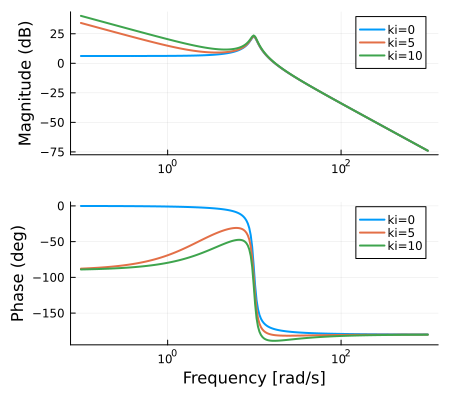

In [11]:
kp = 2
ki = (0, 5, 10)

H = [ P*tf([kp, ki[i]], [1, 0]) for i = 1:length(ki) ]

setPlotScale("dB")
bodeplot(H, lw=2, size=(450,400),
    label=["ki=$(ki[1])" "ki=$(ki[1])" "ki=$(ki[2])" "ki=$(ki[2])" "ki=$(ki[3])" "ki=$(ki[3])"],
    legend=:best, title=""  )

In [12]:
for i in 1:length(ki)
    K = tf([kp, ki[i]], [1, 0])  # PI制御
    H = P * K  # 開ループ系

    println("kI=", ki[i])
    println("(wpc, GM, wgc, PM)")
    println(margin(H))
    println("-----------------")
end

kI=0
(wpc, GM, wgc, PM)
(wgm = [NaN;;], gm = [Inf;;], wpm = [17.231985129715717;;], pm = [7.406517464524029;;])
-----------------
kI=5
(wpc, GM, wgc, PM)
(wgm = [15.671318145841404;;], gm = [0.7374341834142752;;], wpm = [17.29090924820676;;], pm = [0.8699461934346004;;])
-----------------
kI=10
(wpc, GM, wgc, PM)
(wgm = [11.849199557862834;;], gm = [0.2113800049851713;;], wpm = [17.452928304499043;;], pm = [8.761143190659993;;])
-----------------


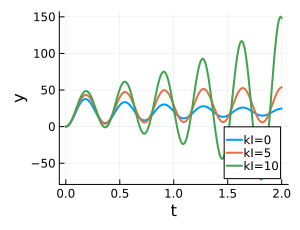

In [13]:
plt = plot()

for i in 1:1:length(ki)
    K = tf([kp, ki[i]], [1, 0])  # PI制御
    Gyr = feedback(P*K,1)  # 閉ループ系
    y, t = step( Gyr, 0:0.01:2 )
    plot!(plt, t, ref*y',
        xlabel="t",   #X軸のラベル
        ylabel="y",   #Y軸のラベル
        lw=2,           #線幅
        ls=:solid,        #線種
        label="kI=$(ki[i])",
        legend=:bottomright,
        size=(300,230)   #プロットのサイズ
    )
end

plot(plt)

### PID制御

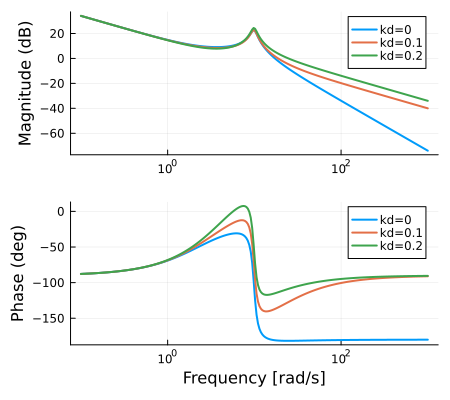

In [14]:
kp = 2
ki = 5
kd = (0, 0.1, 0.2)

H = [ P*tf([kd[i], kp, ki], [1,0]) for i = 1:length(kd) ]

setPlotScale("dB")
bodeplot(H, lw=2, size=(450,400),
    label=["kd=$(kd[1])" "kd=$(kd[1])" "kd=$(kd[2])" "kd=$(kd[2])" "kd=$(kd[3])" "kd=$(kd[3])"],
    legend=:best, title=""  )

In [15]:
for i in 1:length(kd)
    K = tf([kd[i], kp, ki], [1,0])  # PID制御
    H = P * K  # 開ループ系

    println("kD=", kd[i])
    println("(wpc, GM, wgc, PM)")
    println(margin(H))
    println("-----------------")
end

kD=0
(wpc, GM, wgc, PM)
(wgm = [15.671318145841404;;], gm = [0.7374341834142752;;], wpm = [17.29090924820676;;], pm = [0.8699461934346004;;])
-----------------
kD=0.1
(wpc, GM, wgc, PM)
(wgm = [NaN;;], gm = [Inf;;], wpm = [18.809759446133874;;], pm = [45.220116699008315;;])
-----------------
kD=0.2
(wpc, GM, wgc, PM)
(wgm = [NaN;;], gm = [Inf;;], wpm = [24.730502425798765;;], pm = [71.27203690036902;;])
-----------------


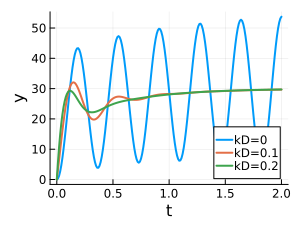

In [16]:
plt = plot()

for i in 1:1:length(kd)
    K = tf([kd[i],kp,ki],[1,0])  # PID制御
    Gyr = feedback(P*K,1)  # 閉ループ系
    y, t = step( Gyr, 0:0.01:2 )
    plot!(plt, t, ref*y',
        xlabel="t",   #X軸のラベル
        ylabel="y",   #Y軸のラベル
        lw=2,           #線幅
        ls=:solid,        #線種
        label="kD=$(kd[i])",
        legend=:bottomright,
        size=(300,230)   #プロットのサイズ
    )
end

plot(plt)

開ループ系の比較

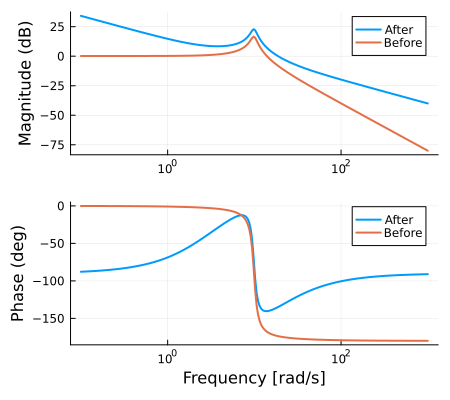

In [17]:
kp = (2, 1)
ki = (5, 0)
kd = (0.1, 0)
Label = ("After", "Before")

H = [ P*tf([kd[i], kp[i], ki[i]], [1,0]) for i = 1:length(kp) ]

setPlotScale("dB")
bodeplot(H, lw=2, size=(450,400),
    label=["After" "After" "Before" "Before"] , title=""  )

In [18]:
for i in 1:length(kp)
    K = tf([kd[i], kp[i], ki[i]], [1,0])  # PID制御
    H = P * K  # 開ループ系

    print("kP=", kp[i], ", kI=", ki[i], ", kD=", kd[i])
    println("(wpc, GM, wgc, PM)")
    println(margin(H))
    println("-----------------")
end

kP=2, kI=5, kD=0.1(wpc, GM, wgc, PM)
(wgm = [NaN;;], gm = [Inf;;], wpm = [18.809759446133874;;], pm = [45.220116699008315;;])
-----------------
kP=1, kI=0, kD=0(wpc, GM, wgc, PM)
(wgm = [NaN;;], gm = [Inf;;], wpm = [14.00755547266918;;], pm = [12.0877310471827;;])
-----------------


閉ループ系の比較

After
定常偏差 =2.220446049250313e-16
------------------
Before
定常偏差 =0.49520444220090865
------------------


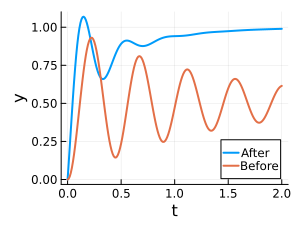

In [19]:
kp = (2, 1)
ki = (5, 0)
kd = (0.1, 0)
Label = ("After", "Before")

plt = plot()

for i in 1:1:length(kd)
    K = tf( [kd[i], kp[i], ki[i]], [1, 0])
    Gyr = feedback(P*K, 1)
    Gyr = minreal(Gyr)
    y, t = step( Gyr, 0:0.01:2 )
    plot!(plt, t, y',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="$(Label[i])",
    legend=:bottomright,
    size=(300,230)   #プロットのサイズ
    )

    println(Label[i])
    e_std = ( 1 - dcgain(Gyr)[])
    println("定常偏差 =", e_std)
    println("------------------")
end

plot(plt)

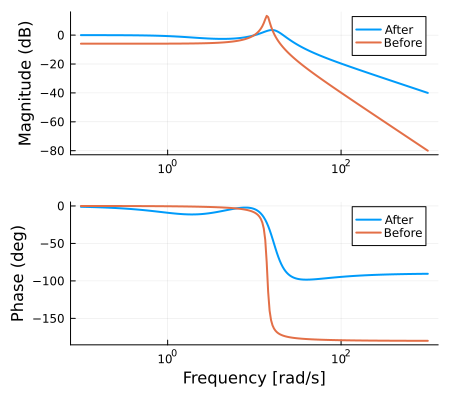

In [20]:
H = [ P*tf([kd[i], kp[i], ki[i]], [1,0]) for i = 1:length(kp) ]
Gyr = [ H[i]/(1+H[i]) for i = 1:length(kp) ]

setPlotScale("dB")
bodeplot(Gyr, lw=2, size=(450,400),
    label=["After" "After" "Before" "Before"] , title=""  )

## 位相遅れ・進み補償

### 位相遅れ

In [21]:
α = 10
T1 = 0.1
K1 = tf([α *T1, α ], [α *T1, 1])

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
1.0s + 10.0
-----------
1.0s + 1.0

Continuous-time transfer function model

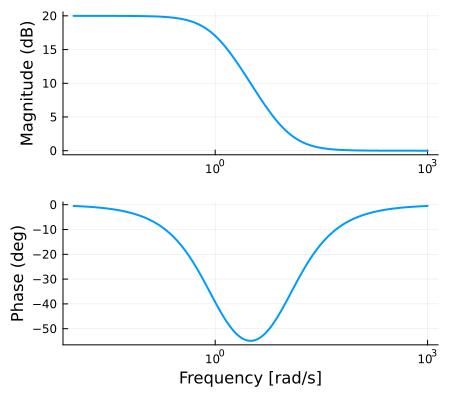

In [22]:
setPlotScale("dB")
bodeplot(K1, lw=2, size=(450,400), legend=false, title=""  )

In [23]:
ωₘ = 1/T1/√α
ϕₘ = asin( (1-α)/(1+α ) ) * 180/π
println("ωₘ=", ωₘ)
println("ϕₘ=", ϕₘ)

ωₘ=3.162277660168379
ϕₘ=-54.90319877241541


In [24]:
α = 100000
T1 = 0.1
K1 = tf([α *T1, α ], [α *T1, 1])

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
10000.0s + 100000.0
-------------------
  10000.0s + 1.0

Continuous-time transfer function model

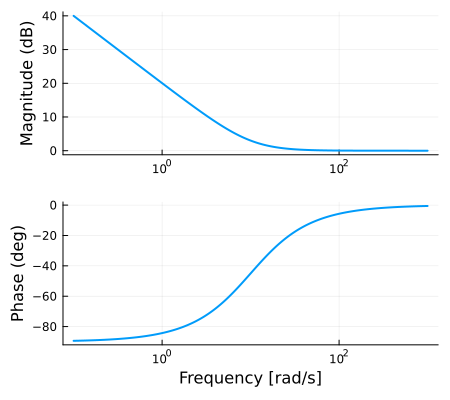

In [25]:
setPlotScale("dB")
bodeplot(K1, lw=2, size=(450,400), legend=false, title=""  )

In [26]:
ωₘ = 1/T1/√α
ϕₘ = asin( (1-α)/(1+α ) ) * 180/π
println("ωₘ=", ωₘ)
println("ϕₘ=", ϕₘ)

ωₘ=0.03162277660168379
ϕₘ=-89.63763088074153


### 位相進み

In [27]:
β = 0.1
T2 = 1
K2 = tf([T2, 1],[β*T2, 1])

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
1.0s + 1.0
----------
0.1s + 1.0

Continuous-time transfer function model

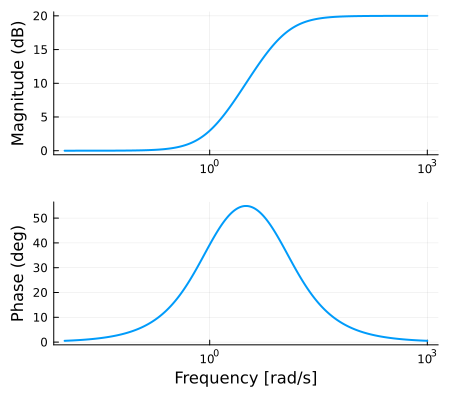

In [28]:
setPlotScale("dB")
bodeplot(K2, lw=2, size=(450,400), legend=false, title=""  )

In [29]:
ωₘ = 1/T2/√β
ϕₘ = asin( (1-β)/(1+β ) ) * 180/π
println("ωₘ=", ωₘ)
println("ϕₘ=", ϕₘ)

ωₘ=3.162277660168379
ϕₘ=54.9031987724154


In [30]:
β = 0.000001
T2 = 1
K2 = tf([T2, 1],[β*T2, 1])

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
 1.0s + 1.0
-------------
1.0e-6s + 1.0

Continuous-time transfer function model

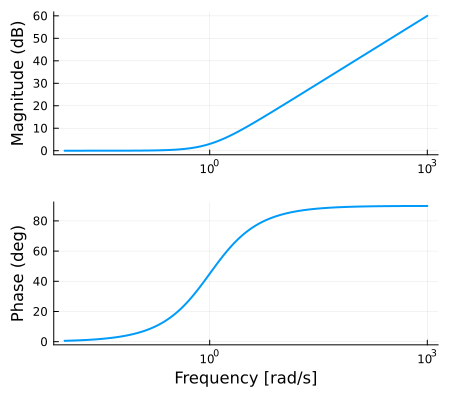

In [31]:
setPlotScale("dB")
w = exp10.( -2:0.01:3 )
bodeplot(K2, w, lw=2, size=(450,400), legend=false, title=""  )

In [32]:
ωₘ = 1/T2/√β
ϕₘ = asin( (1-β)/(1+β ) ) * 180/π
println("ωₘ=", ωₘ)
println("ϕₘ=", ϕₘ)

ωₘ=1000.0
ϕₘ=89.88540847917132


## アームの角度制御（位相遅れ・進み補償）

In [33]:
g  = 9.81                # 重力加速度[m/s^2]
l  = 0.2                 # アームの長さ[m]
M  = 0.5                 # アームの質量[kg]
mu = 1.5e-2              # 粘性摩擦係数
J  = 1.0e-2              # 慣性モーメント

P = tf( [0,1], [J, mu, M*g*l] )

ref = 30 # 目標角度 [deg]

30

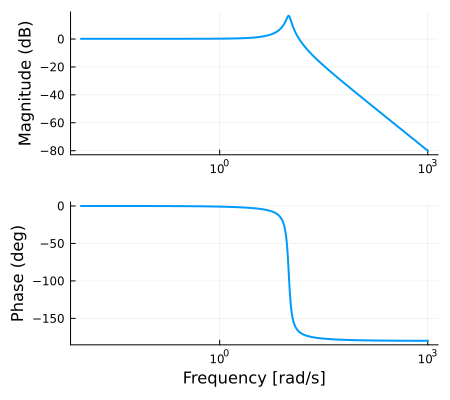

In [34]:
setPlotScale("dB")
w = exp10.( -2:0.001:3 )
bodeplot(P, w, lw=2, size=(450,400), legend=false, title=""  )

制御対象のボード線図．
低周波ゲインが０[dB]なので，このままフィードバック系を構築しても定常偏差が残る．

### 位相遅れ補償の設計

** 定常偏差を小さくするために，位相遅れ補償から設計する **

低周波ゲインを上げるために，$\alpha=20$とする．そして，ゲインを上げる周波数は，$T_1$で決めるが，最終的なゲイン交差周波数（ゲイン交差周波数の設計値）の１０分の１程度を$1/T_1$にするために，$T_1=0.25$とする（$1/T_1=40/10=4$）．

In [35]:
α = 20
T1 = 0.25
K1 = tf([α*T1, α], [α*T1, 1])
println(K1)

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
5.0s + 20.0
-----------
5.0s + 1.0

Continuous-time transfer function model


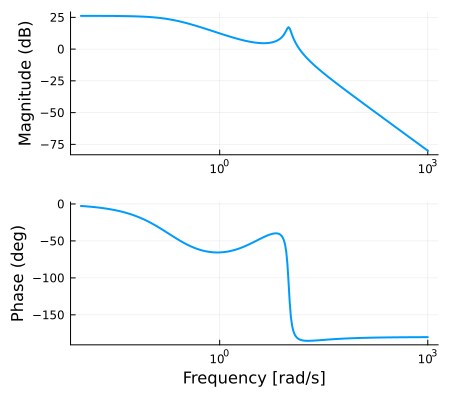

In [36]:
H1 = P*K1
setPlotScale("dB")
bodeplot(H1, lw=2, size=(450,400), legend=false, title=""  )

In [37]:
sys = freqresp(H1, [40])
phaseH1at40 = atan(imag(sys)[],real(sys)[]) * (180/π)
println("-----------------------")
println("phase at 40rad/s =", phaseH1at40-360)
#（注意）freqrespは -180 を下回っているときに +360 を加えて出力されるため phaseH1at40-360 を表示している
# ただし，phaseH1at40 の値は，このあとの計算ではそのまま用いても問題ない

-----------------------
phase at 40rad/s =-183.1364012726378


最終的にゲイン補償によって，ゲイン交差周波数を設計値の40[rad/s]まで上げるが，あげてしまうと，位相余裕が60[dB]を下回る．実際， 40[rad/s]における位相は -183[deg]程度なので，位相余裕は -3[deg]程度になってしまう．したがって，40[rad/s]での位相を -120[deg] まであげておく．

### 位相進み補償の設計

** 位相進み補償の設計 ** 

40[rad/s]において位相を進ませる量は　60 - (180-183) = 63[deg]程度とする．

In [38]:
ϕₘ= (60- (180 + phaseH1at40 ) ) * π/180
β = (1-sin(ϕₘ))/(1+sin(ϕₘ))
T2 = 1/40/√β
K2 = tf([T2, 1],[β*T2, 1])
println(K2)

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
0.10468126899830243s + 1.0
---------------------------
0.005970504618263038s + 1.0

Continuous-time transfer function model


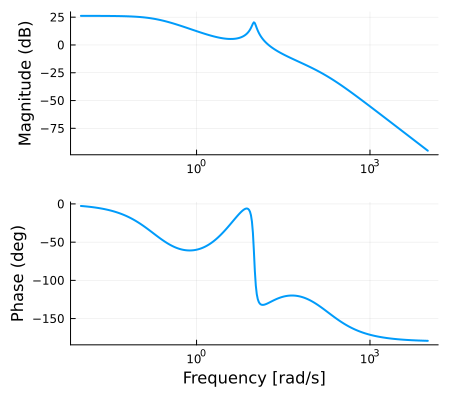

In [39]:
H2 = P*K1*K2
setPlotScale("dB")
bodeplot(H2, lw=2, size=(450,400), legend=false, title=""  )

In [40]:
sys = freqresp(H2, [40])
magH2at40 = abs(sys[])
phaseH2at40 = atan(imag(sys)[],real(sys)[]) * (180/π)
println("-----------------------")
println("gain at 40rad/s =", 20*log10(magH2at40))
println("phase at 40rad/s =", phaseH2at40)

-----------------------
gain at 40rad/s =-11.058061395752679
phase at 40rad/s =-119.99999999999997


位相進み補償により，40[rad/s]での位相が -120[deg]となっている．
あとは，ゲイン補償により，40[rad/s]のゲインを 0[dB] にすればよい．

In [41]:
magH2at40

0.27996060941679224

### ゲイン補償の設計

** ゲイン補償の設計 **

40[rad/s] におけるゲインが -11.06[dB] 程度なので， 11.06[dB]分上に移動させる．
そのために，$k = 1/magL2at40$ をゲイン補償とする．
これにより，40[rad/s]がゲイン交差周波数になり，位相余裕もPM=60[deg]となる．

In [42]:
k = 1/magH2at40
print("k=", k)

k=3.571931073029088

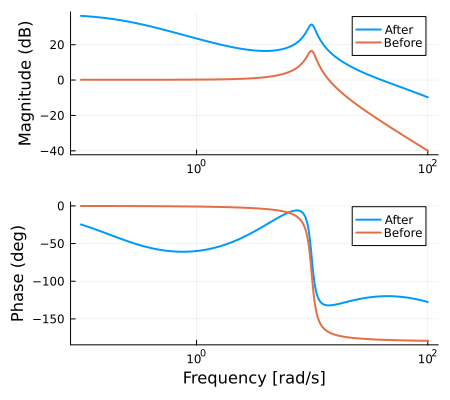

In [43]:
H = P*k*K1*K2
setPlotScale("dB")
w = exp10.(-1:0.01:2)
bodeplot([H, P], w, lw=2, size=(450,400),
    label=["After" "After" "Before" "Before"] , title=""  )

In [44]:
println("(wpc, GM, wgc, PM)")
println(margin(H))

(wpc, GM, wgc, PM)
(wgm = [NaN;;], gm = [Inf;;], wpm = [40.018325278977585;;], pm = [60.00128104275365;;])


### 閉ループ系の応答

error=0.013546052578222278
------------------
error=0.49520444220090865
------------------


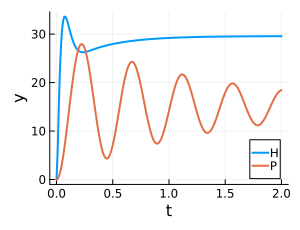

In [45]:
plt = plot()

Gyr_H = feedback(H, 1)
y, t = step( Gyr_H, 0:0.01:2 )
plot!(plt, t, ref*y',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="H",
    legend=:bottomright,
    size=(300,230)   #プロットのサイズ
)

e_std = 1 - dcgain(Gyr_H)[]
println("error=", e_std)
println("------------------")

Gyr_P = feedback(P, 1)
y, t = step( Gyr_P, 0:0.01:2 )
plot!(plt, t, ref*y',
    xlabel="t",   #X軸のラベル
    ylabel="y",   #Y軸のラベル
    lw=2,           #線幅
    ls=:solid,        #線種
    label="P",
    legend=:bottomright,
    size=(300,230)   #プロットのサイズ
)

e_std = 1 - dcgain(Gyr_P)[]
println("error=", e_std)
println("------------------")


plot(plt)

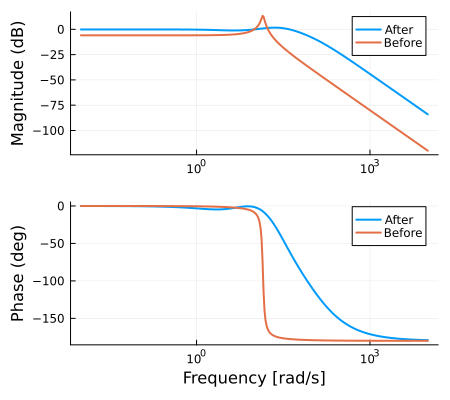

In [46]:
Gyr = [ H/(1+H), P/(1+P)]

setPlotScale("dB")
bodeplot(Gyr, lw=2, size=(450,400),
        label=["After" "After" "Before" "Before"] , title=""  )

In [47]:
println("直流ゲイン =", 20*log10(dcgain(Gyr_H)[]) )
println("------------------")
println("直流ゲイン =", 20*log10(dcgain(Gyr_P)[]) )
println("------------------")

直流ゲイン =-0.11846369931437545
------------------
直流ゲイン =-5.937689510770942
------------------
